In [1]:
import itk
import matplotlib.pyplot as plt
import icon_registration.test_utils
import numpy as np

In [2]:
logo_path = str(icon_registration.test_utils.TEST_DATA_DIR / "itkLogo.jpg")

In [3]:
logo_rgb = itk.imread(logo_path)
logo = itk.image_from_array(itk.array_from_image(logo_rgb)[:, :, 0])
logo.SetSpacing(logo_rgb.GetSpacing())
logo.SetDirection(itk.matrix_from_array(np.sqrt(.5) * np.array([[0, -1], [1, 1]])))
logo_no_spacing = itk.image_from_array(itk.array_from_image(logo))


In [4]:
def itk_show(im):
    print(im.GetSpacing())
    print(itk.template(im))
    plt.imshow(itk.array_from_image(im))
    plt.show()

itkVectorD2 ([0.352778, 0.352778])
(<itkTemplate itk::Image>, (<itkCType unsigned char>, 2))


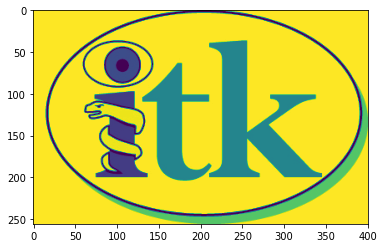

itkVectorD2 ([1, 1])
(<itkTemplate itk::Image>, (<itkCType unsigned char>, 2))


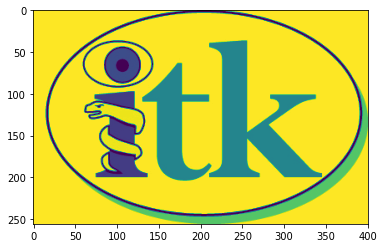

In [5]:
itk_show(logo)
itk_show(logo_no_spacing)

In [6]:
from icon_registration.itk_wrapper import resampling_transform

In [7]:
transform = resampling_transform(logo, [200, 100])

In [8]:
resampler = itk.LinearInterpolateImageFunction.New(logo)

In [23]:
out = itk.resample_image_filter(
    logo,
    transform=transform,
    interpolator = resampler,
    size=[200, 100],
)

itkVectorD2 ([1, 1])
(<itkTemplate itk::Image>, (<itkCType unsigned char>, 2))


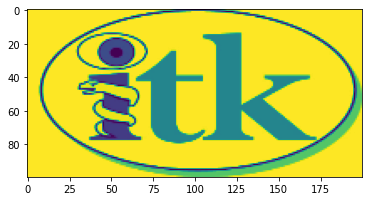

In [24]:
itk_show(out)

In [25]:
invTrans = transform.GetInverseTransform()

In [42]:
resampler = itk.LinearInterpolateImageFunction.New(out)
out2 = itk.resample_image_filter(
    out,
    transform=invTrans,
    interpolator=resampler,
    size=itk.size(logo),
    output_spacing=itk.spacing(logo),
    output_direction=logo.GetDirection())

itkVectorD2 ([0.352778, 0.352778])
(<itkTemplate itk::Image>, (<itkCType unsigned char>, 2))


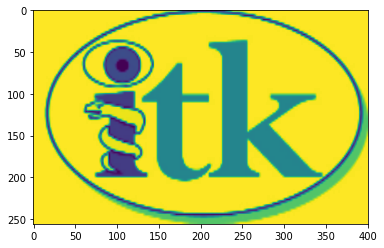

In [43]:
itk_show(out2)

In [14]:
itk.template(logo)[0][itk.template(logo)[1]]

itk.itkImagePython.itkImageUC2

In [15]:
logo.GetLargestPossibleRegion().GetSize()[0]

401

In [54]:
ct = itk.CompositeTransform[itk.D, 3].New()
ct.PrependTransform()

In [16]:
itk.CenteredTransformInitializer.GetTypes()

<itkTemplate itk::CenteredTransformInitializer>
Options:
  [<class 'itk.itkMatrixOffsetTransformBasePython.itkMatrixOffsetTransformBaseD22'>, <class 'itk.itkImagePython.itkImageD2'>, <class 'itk.itkImagePython.itkImageD2'>]
  [<class 'itk.itkMatrixOffsetTransformBasePython.itkMatrixOffsetTransformBaseD22'>, <class 'itk.itkImagePython.itkImageF2'>, <class 'itk.itkImagePython.itkImageF2'>]
  [<class 'itk.itkMatrixOffsetTransformBasePython.itkMatrixOffsetTransformBaseD22'>, <class 'itk.itkImagePython.itkImageSS2'>, <class 'itk.itkImagePython.itkImageSS2'>]
  [<class 'itk.itkMatrixOffsetTransformBasePython.itkMatrixOffsetTransformBaseD22'>, <class 'itk.itkImagePython.itkImageUC2'>, <class 'itk.itkImagePython.itkImageUC2'>]
  [<class 'itk.itkMatrixOffsetTransformBasePython.itkMatrixOffsetTransformBaseD22'>, <class 'itk.itkImagePython.itkImageUS2'>, <class 'itk.itkImagePython.itkImageUS2'>]
  [<class 'itk.itkVersorRigid3DTransformPython.itkVersorRigid3DTransformD'>, <class 'itk.itkImagePytho

In [45]:
t3 = itk.VersorRigid3DTransform[itk.D].New()

In [47]:
t3.GetVersor()

<itk.itkVersorPython.itkVersorD; proxy of <Swig Object of type 'itkVersorD *' at 0x7f2801f02ba0> >

In [59]:
t3.GetInverseTransform().SetMatrix

AttributeError: 'itkTransformD33' object has no attribute 'SetMatrix'